In [1]:
# Import libraries 
from IPython.display import display, Markdown
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import io

In [2]:
# Set float format for display (e.g., 2 decimal places)
pd.options.display.float_format = '{:.2f}'.format

In [3]:
# Load dataset
os.listdir("/kaggle/input")
df = pd.read_csv("/kaggle/input/london-house-price-prediction-advanced-techniques/train.csv")

In [4]:
display(Markdown("""### Question should be asked at this step:
- 1.  What is the shape of the dataset?
- 2.  Does this size make sense for modeling, or is it too small/too big?
- 3.  What types of features do I have? (Numerical, Categorical, Text, Dates, Coordinates?)
- 4.  Any features with wrong types? (e.g., dates stored as strings?)
- 5.  Which columns have missing values?
- 6.  Are they random or do they follow a pattern?
- 7.  Should I impute, drop, or create an indicator for missingness?
- 8.  What are the min, max, mean, median, and std of numeric columns?
- 9.  Are there skewed distributions?
- 10. Any unrealistic values or outliers?
- 11. How is the target variable (price) distributed?
- 12. Does it have skewness or extreme outliers?
- 13. What’s the range and variance?
- 14. Any duplicate rows or columns?
- 15. Do some columns carry the same information (e.g., postcode vs outcode)?
- 16. Any ID columns with no analytical value?
- 17. Do latitude and longitude match known regions in London?
- 18. Are there clusters by postcode or outcode?
- 19. Which features might affect house prices? (Bedrooms? Location? Property type? Area?)
- 20. Are there engineered features I can create? (e.g., price_per_sqm, is_flat, property_age"""))

# Intial exploration 
# DataFrame Shape
display(Markdown("### 🧾 DataFrame Shape"))
display(Markdown(f"`{df.shape}`"))

# DataFrame Info
buffer = io.StringIO()
df.info(buf=buffer)
info_str = buffer.getvalue()

display(Markdown("### 🧾 DataFrame Info"))
display(Markdown(f"```\n{info_str}\n```"))

# DataFrame Describe
display(Markdown("### 🧾 DataFrame Describe"))
display(df.describe())

#Duplicated rows
display(Markdown("### 🧾 Duplicated Rows"))
display(df.duplicated().sum())

### Question should be asked at this step:
- 1.  What is the shape of the dataset?
- 2.  Does this size make sense for modeling, or is it too small/too big?
- 3.  What types of features do I have? (Numerical, Categorical, Text, Dates, Coordinates?)
- 4.  Any features with wrong types? (e.g., dates stored as strings?)
- 5.  Which columns have missing values?
- 6.  Are they random or do they follow a pattern?
- 7.  Should I impute, drop, or create an indicator for missingness?
- 8.  What are the min, max, mean, median, and std of numeric columns?
- 9.  Are there skewed distributions?
- 10. Any unrealistic values or outliers?
- 11. How is the target variable (price) distributed?
- 12. Does it have skewness or extreme outliers?
- 13. What’s the range and variance?
- 14. Any duplicate rows or columns?
- 15. Do some columns carry the same information (e.g., postcode vs outcode)?
- 16. Any ID columns with no analytical value?
- 17. Do latitude and longitude match known regions in London?
- 18. Are there clusters by postcode or outcode?
- 19. Which features might affect house prices? (Bedrooms? Location? Property type? Area?)
- 20. Are there engineered features I can create? (e.g., price_per_sqm, is_flat, property_age

### 🧾 DataFrame Shape

`(266325, 17)`

### 🧾 DataFrame Info

```
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266325 entries, 0 to 266324
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   266325 non-null  int64  
 1   fullAddress          266325 non-null  object 
 2   postcode             266325 non-null  object 
 3   country              266325 non-null  object 
 4   outcode              266325 non-null  object 
 5   latitude             266325 non-null  float64
 6   longitude            266325 non-null  float64
 7   bathrooms            217846 non-null  float64
 8   bedrooms             241482 non-null  float64
 9   floorAreaSqM         252519 non-null  float64
 10  livingRooms          229285 non-null  float64
 11  tenure               260604 non-null  object 
 12  propertyType         265817 non-null  object 
 13  currentEnergyRating  209511 non-null  object 
 14  sale_month           266325 non-null  int64  
 15  sale_year            266325 non-null  int64  
 16  price                266325 non-null  int64  
dtypes: float64(6), int64(4), object(7)
memory usage: 34.5+ MB

```

### 🧾 DataFrame Describe

,ID,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,sale_month,sale_year,price
count,266325.00,266325.00,266325.00,217846.00,241482.00,252519.00,229285.00,266325.00,266325.00,266325.00
mean,133162.00,51.51,-0.10,1.44,2.50,99.62,1.29,6.81,2012.21,616178.82
std,76881.55,0.06,0.09,0.72,1.17,56.45,0.58,3.36,9.14,1274104.56
min,0.00,51.39,-0.35,1.00,1.00,10.00,1.00,1.00,1995.00,10000.00
25%,66581.00,51.47,-0.16,1.00,2.00,63.00,1.00,4.00,2004.00,216500.00
50%,133162.00,51.51,-0.11,1.00,2.00,85.00,1.00,7.00,2014.00,385000.00
75%,199743.00,51.55,-0.05,2.00,3.00,118.00,1.00,10.00,2021.00,650000.00
max,266324.00,51.67,0.14,9.00,9.00,500.00,9.00,12.00,2023.00,100000000.00


### 🧾 Duplicated Rows

0

In [5]:
# Based on info() and describe(), Let's start data cleaning 
# Handling Missing Values
display(Markdown("""### 🧾 1. Handling missing values:
- Impute missing values for numerical features (e.g., 'bedrooms', 'bathrooms') using the median to avoid the influence of outliers.
- For categorical features (e.g., 'propertyType', 'tenure'), fill missing values with the mode (most frequent value).
- Avoid dropping rows for important features like 'bedrooms' (with ~10% missing), as it may lead to loss of valuable data."""))

# Impute missing values for numerical columns (e.g., median imputation)
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].median())
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].median())
df['livingRooms'] = df['livingRooms'].fillna(df['livingRooms'].median())
df['floorAreaSqM'] = df['floorAreaSqM'].fillna(df['floorAreaSqM'].median())


# Impute categorical columns with mode
df['tenure'] = df['tenure'].fillna(df['tenure'].mode()[0])
df['propertyType'] = df['propertyType'].fillna(df['propertyType'].mode()[0])
df['currentEnergyRating'] = df['currentEnergyRating'].fillna(df['currentEnergyRating'].mode()[0])

### 🧾 1. Handling missing values:
- Impute missing values for numerical features (e.g., 'bedrooms', 'bathrooms') using the median to avoid the influence of outliers.
- For categorical features (e.g., 'propertyType', 'tenure'), fill missing values with the mode (most frequent value).
- Avoid dropping rows for important features like 'bedrooms' (with ~10% missing), as it may lead to loss of valuable data.

### 🧾 2. Handle Outliers
- Outliers are extreme values that can distort the results of data analysis and model training.
- They can be detected using methods like IQR, Z-score, or visualizations (boxplots, scatter plots).
- In this case, we're focusing on handling outliers for key numeric columns like 'price', 'floorAreaSqM', etc.
- We chose to remove extreme outliers using IQR method for simplicity and effectiveness.
- More advanced methods like log transformation or robust models exist but are not used here to keep the pipeline clean and interpretable.
- ✅ Replacing missing (null) values with median is a common and safe practice,
- especially when the percentage of missing data is low and the column is skewed.
- ❌ But replacing outliers with median is discouraged as it removes real (but extreme) observations.
- It's better to analyze or transform outliers instead of just masking them.

### IQR (Price): 

433500.0


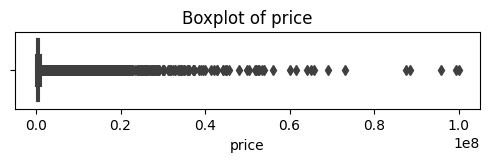

### IQR (floorAreaSqM): 

46.0


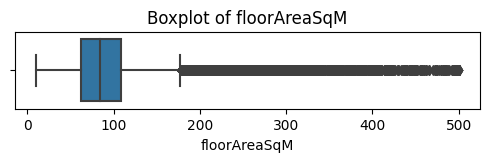

### IQR (bathrooms): 

0.0


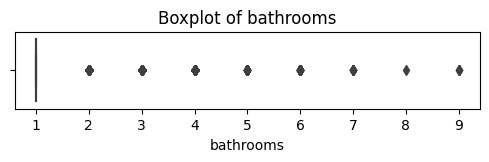

### IQR (bedrooms): 

1.0


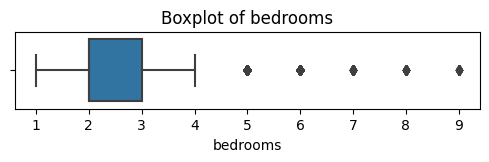

### IQR (livingRooms): 

0.0


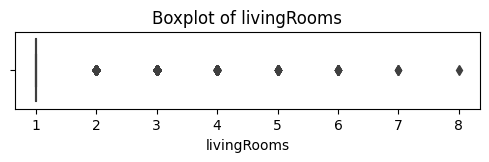

In [6]:
# Handling Outliers 
display(Markdown("""### 🧾 2. Handle Outliers
- Outliers are extreme values that can distort the results of data analysis and model training.
- They can be detected using methods like IQR, Z-score, or visualizations (boxplots, scatter plots).
- In this case, we're focusing on handling outliers for key numeric columns like 'price', 'floorAreaSqM', etc.
- We chose to remove extreme outliers using IQR method for simplicity and effectiveness.
- More advanced methods like log transformation or robust models exist but are not used here to keep the pipeline clean and interpretable.
- ✅ Replacing missing (null) values with median is a common and safe practice,
- especially when the percentage of missing data is low and the column is skewed.
- ❌ But replacing outliers with median is discouraged as it removes real (but extreme) observations.
- It's better to analyze or transform outliers instead of just masking them."""))

# Calculate IQR for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
display(Markdown("### IQR (Price): "))
print(IQR)

plt.figure(figsize=(6, 1))  # width=6, height=2
sns.boxplot(x=df['price'])
plt.title('Boxplot of price')
plt.show()

# Filter out outliers based on IQR
df = df[(df['price'] >= (Q1 - 1.5 * IQR)) & (df['price'] <= (Q3 + 1.5 * IQR))]

#💡 Why 1.5?
# The 1.5 is a rule of thumb to give a reasonable range
# It helps flag values that are much smaller or much larger than the majority
# In most cases, yes — we use 1.5 * IQR to detect outliers
#🚨 But there are also other thresholds:
# Multiplier | Used For             | Meaning
# 1.5        | 🟡 Mild Outliers    | Most common for basic outlier detection
# 3.0        | 🔴 Extreme Outliers | Used when you want to detect only very unusual values

# Calculate IQR for the 'floorAreaSqM' column
Q1 = df['floorAreaSqM'].quantile(0.25)
Q3 = df['floorAreaSqM'].quantile(0.75)
IQR = Q3 - Q1
display(Markdown("### IQR (floorAreaSqM): "))
print(IQR)

plt.figure(figsize=(6, 1))  # width=6, height=2
sns.boxplot(x=df['floorAreaSqM'])
plt.title('Boxplot of floorAreaSqM')
plt.show()

# Filter out outliers based on IQR
df = df[(df['floorAreaSqM'] >= (Q1 - 1.5 * IQR)) & (df['floorAreaSqM'] <= (Q3 + 1.5 * IQR))]

# Calculate IQR for the 'bathrooms' column
Q1 = df['bathrooms'].quantile(0.25)
Q3 = df['bathrooms'].quantile(0.75)
IQR = Q3 - Q1
display(Markdown("### IQR (bathrooms): "))
print(IQR)

plt.figure(figsize=(6, 1))  # width=6, height=2
sns.boxplot(x=df['bathrooms'])
plt.title('Boxplot of bathrooms')
plt.show()

# Calculate IQR for the 'bedrooms' column
Q1 = df['bedrooms'].quantile(0.25)
Q3 = df['bedrooms'].quantile(0.75)
IQR = Q3 - Q1
display(Markdown("### IQR (bedrooms): "))
print(IQR)

plt.figure(figsize=(6, 1))  # width=6, height=2
sns.boxplot(x=df['bedrooms'])
plt.title('Boxplot of bedrooms')
plt.show()


# Calculate IQR for the 'livingRooms' column
Q1 = df['livingRooms'].quantile(0.25)
Q3 = df['livingRooms'].quantile(0.75)
IQR = Q3 - Q1
display(Markdown("### IQR (livingRooms): "))
print(IQR)

plt.figure(figsize=(6, 1))  # width=6, height=2
sns.boxplot(x=df['livingRooms'])
plt.title('Boxplot of livingRooms')
plt.show()

# Outlier Detection Strategy:
# - Used IQR for features with sufficient spread (e.g., floorAreaSqM, price).
# - Skipped IQR for features like bathrooms/livingRooms where IQR = 0.
# - For such features, considered valid upper limits or domain-based thresholds.
# - IQR is not ideal when data is heavily skewed or lacks spread; alternatives like percentiles or manual capping may work better.

#Detail Interpretation for livivngRooms same applies to other variables like bathroom and bedroom
# ✅ Interpretation:
# Over 92% of the values are 1.0 (211,437 out of ~229,000).
# Very few entries have more than 2 living rooms.
# This is a right-skewed distribution, not a case where IQR is helpful.
# ✅ What to do:
# Don’t use IQR for outlier detection here.
# You can either:
# Leave as is
# Or flag rows with livingRooms > 5 as rare/extreme if it helps modeling.

In [7]:
display(Markdown("""### 🧾 3. Covert Datatypes
- Convert columns like sale_month and sale_year to integers, 
and make sure the ID column is not treated as a numerical value for modeling purposes."""))

# Convert columns to appropriate types
df['sale_month'] = df['sale_month'].astype(int)
df['sale_year'] = df['sale_year'].astype(int)
df['livingRooms'] = df['livingRooms'].astype(int)
df['bedrooms'] = df['bedrooms'].astype(int)
df['bathrooms'] = df['bathrooms'].astype(int)
df['ID'] = df['ID'].astype(str)

# The 'ID' column is just an identifier and holds no predictive value.
# Including it as a numeric feature can mislead the model by introducing noise.
# Therefore, we will drop it before training.

### 🧾 3. Covert Datatypes
- Convert columns like sale_month and sale_year to integers, 
and make sure the ID column is not treated as a numerical value for modeling purposes.

In [8]:
display(Markdown("""### 🧾 4. Handling Categorical values
- Identify categorical columns from df.info() include propertyType, tenure, country, etc.
- Convert categorical variables into numeric formats using techniques like One-Hot Encoding or Label Encoding.
- Use One-Hot Encoding for categorical data with no order (like propertyType).
- Use Label Encoding for few categories or ordinal features (like tenure).
- While One-Hot Encoding is technically correct for nominal variables like tenure, we sometimes use Label Encoding if:
- ✅ The number of categories is small (like 2–3).
- ✅ We're using models that don’t assume order, like Decision Trees or Random Forests.
- ❌ We avoid it with models like Linear Regression, because they might treat encoded numers as having order"""))

# PropertyType
# Example: Group rare property types
rare_props = df['propertyType'].value_counts()[df['propertyType'].value_counts() < 500].index
df['propertyType'] = df['propertyType'].replace(rare_props, 'Other')

# One-hot encoding for 'propertyType'
df = pd.get_dummies(df, columns=['propertyType'], drop_first=True)

# Label encoding for 'tenure'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['tenure'] = le.fit_transform(df['tenure'])

# Target Encoding for 'postcode' & 'outcode'
# ✅ Used Target Encoding for 'postcode' since it has many unique values and strong influence on price.
# ➕ Encoded by mapping each postcode to its average house price in the training data.
# ⚠️ For unseen postcodes in test set, we used the overall mean price as a fallback to avoid errors.

postcode_means = df.groupby('postcode')['price'].mean()
global_mean = df['price'].mean()
df['postcode_encoded'] = df['postcode'].map(postcode_means)

# ✅ Location Encoding Decision:
# - Dropped 'postcode' due to too many unique values (~40,000+), which can lead to high dimensionality and overfitting.
# - Kept 'outcode' instead, as it represents area-level location (fewer categories, more stable for modeling).
# - 'outcode' will be used to capture geographic pricing trends in a generalizable way.

outcode_means = df.groupby('outcode')['price'].mean()
global_mean = df['price'].mean()
df['outcode_encoded'] = df['outcode'].map(outcode_means)

# Label encoding for 'currentEnergyRating'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['currentEnergyRating'] = le.fit_transform(df['currentEnergyRating'])

### 🧾 4. Handling Categorical values
- Identify categorical columns from df.info() include propertyType, tenure, country, etc.
- Convert categorical variables into numeric formats using techniques like One-Hot Encoding or Label Encoding.
- Use One-Hot Encoding for categorical data with no order (like propertyType).
- Use Label Encoding for few categories or ordinal features (like tenure).
- While One-Hot Encoding is technically correct for nominal variables like tenure, we sometimes use Label Encoding if:
- ✅ The number of categories is small (like 2–3).
- ✅ We're using models that don’t assume order, like Decision Trees or Random Forests.
- ❌ We avoid it with models like Linear Regression, because they might treat encoded numers as having order

In [9]:
display(Markdown("""### 🧾 5. Feature Engineering (Optional)
- Create New Features:
- Based on your analysis, you can create new features. For example:
- Price per Square Meter = price / floorAreaSqM
- Age of House = sale_year - year_built (if available)
- Next Step: Add these features to your DataFrame."""))

# Create a new feature: price per square meter
# Protecting against division by zero with .replace(0, np.nan)
df["price_per_sqm"] = df["price"] / df["floorAreaSqM"].replace(0, np.nan)

# Total number of rooms (may reflect house size better)
df["total_rooms"] = df["bathrooms"] + df["bedrooms"] + df["livingRooms"]

# Area per room: useful to capture room spaciousness
df["area_per_room"] = df["floorAreaSqM"] / df["total_rooms"].replace(0, np.nan)

### 🧾 5. Feature Engineering (Optional)
- Create New Features:
- Based on your analysis, you can create new features. For example:
- Price per Square Meter = price / floorAreaSqM
- Age of House = sale_year - year_built (if available)
- Next Step: Add these features to your DataFrame.

In [10]:
display(Markdown("""### 🧾 6. Handling skewed data 
- Outlier removal deals with extreme individual values, but skewness involves the overall distribution shape.
- Log/Sqrt transformation is applied to reduce right-skewness by compressing large values, which improves model performance by making the data more symmetric and normal.
- Right-skewed data can still be used in models, but it may introduce challenges like bias or poor fit, especially for algorithms that assume normality.
- Transforming right-skewed data (e.g., with log or square root) can help models make better predictions, reduce bias, and meet assumptions like normality.
- Tree-based models and robust models can handle skewed data effectively without needing transformations"""))

df['price'] = np.log1p(df['price'])
df['price_per_sqm'] = np.log1p(df['price_per_sqm'])
df['floorAreaSqM'] = np.log1p(df['floorAreaSqM'])
df['area_per_room'] = np.log1p(df['area_per_room'])
df['bedrooms'] = np.log1p(df['bedrooms'])
df['bathrooms'] = np.log1p(df['bathrooms'])
df['livingRooms'] = np.log1p(df['livingRooms'])
df['total_rooms'] = np.log1p(df['total_rooms'])




### 🧾 6. Handling skewed data 
- Outlier removal deals with extreme individual values, but skewness involves the overall distribution shape.
- Log/Sqrt transformation is applied to reduce right-skewness by compressing large values, which improves model performance by making the data more symmetric and normal.
- Right-skewed data can still be used in models, but it may introduce challenges like bias or poor fit, especially for algorithms that assume normality.
- Transforming right-skewed data (e.g., with log or square root) can help models make better predictions, reduce bias, and meet assumptions like normality.
- Tree-based models and robust models can handle skewed data effectively without needing transformations

In [11]:
display(Markdown("""### 🧾 7. Normalize/Scale Data:
- Purpose: To bring features onto a similar scale, avoid models being dominated by large-value features, and speed up convergence.
- When to Scale: Use scaling when your model is sensitive to the scale of data (e.g., KNN, SVM, Neural Networks).
- Methods: Min-Max scaling (for bounded range), Standardization (for data with normal distribution), and Robust scaling (for data with outliers).
- Any algorithm that uses distance metrics (like KNN and K-Means) or gradient-based optimization (like Logistic Regression, Neural Networks, and SVM) 
  will be affected by unscaled features. Scaling or normalizing the data ensures that all features contribute equally, 
  helping the algorithm perform better and more efficiently."""))

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
columns_to_scale = ['latitude', 'longitude', 'bathrooms', 'bedrooms', 'floorAreaSqM', 'livingRooms', 'area_per_room', 'total_rooms']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

### 🧾 7. Normalize/Scale Data:
- Purpose: To bring features onto a similar scale, avoid models being dominated by large-value features, and speed up convergence.
- When to Scale: Use scaling when your model is sensitive to the scale of data (e.g., KNN, SVM, Neural Networks).
- Methods: Min-Max scaling (for bounded range), Standardization (for data with normal distribution), and Robust scaling (for data with outliers).
- Any algorithm that uses distance metrics (like KNN and K-Means) or gradient-based optimization (like Logistic Regression, Neural Networks, and SVM) 
  will be affected by unscaled features. Scaling or normalizing the data ensures that all features contribute equally, 
  helping the algorithm perform better and more efficiently.

In [12]:
display(Markdown("""
### 🧾 8. Drop Duplicates:
- **Purpose**: To remove any repeated rows in the dataset that might affect the model's performance or cause overfitting.
- **Why It Matters**: Duplicates can distort the training process, lead to biased results, and increase computation time.
- **How It's Done**: Identify duplicated rows using `duplicated()` and drop them using `drop_duplicates()`. This ensures data integrity and improves model accuracy.
"""))

# Dropping duplicate rows from the DataFrame
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Drop duplicates and update the DataFrame
df = df.drop_duplicates()

# Display the updated shape of the DataFrame after dropping duplicates
print("Updated DataFrame shape after dropping duplicates:")
display(df.shape)




### 🧾 8. Drop Duplicates:
- **Purpose**: To remove any repeated rows in the dataset that might affect the model's performance or cause overfitting.
- **Why It Matters**: Duplicates can distort the training process, lead to biased results, and increase computation time.
- **How It's Done**: Identify duplicated rows using `duplicated()` and drop them using `drop_duplicates()`. This ensures data integrity and improves model accuracy.


Number of duplicate rows: 0
Updated DataFrame shape after dropping duplicates:


(233986, 30)